# Chap05 - 컴퓨터 비전을 위한 딥러닝

## 5.1 합성곱 신경망 소개



- 예제 코드 Jupyter Notebook → [[링크]](https://github.com/ExcelsiorCJH/Deep-Learning-with-Python/blob/master/Chap05-Deep_learning_for_computer_vision/5.1-introduction-to-convnets.ipynb)

### 5.1.1 합성곱(convolution) 연산

완전 연결 층(FC layer 또는 dense layer)과 합성곱 층(conv layer) 사이의 근본적인 차이는 다음과 같다.
- `Dense` 층은 입력 특성 공간에 있는 **전역 패턴(global patterns)**을 학습한다.
- 합성곱 층(`Conv2D`)은 **지역 패턴(local patterns)**을 학습한다. 
  - 이미지일 경우 작은 `2D` 윈도우(window = filter/kernel)로 입력에서 패턴을 찾는다.



![](./images/dense-vs-conv.PNG)





컨브넷(CNN)은 다음과 같은 성질을 가진다.

- **학습된 패턴은 평행 이동 불변성(translation invariant)을 가진다.**
  - 컨브넷이 이미지의 오른쪽 아래 모서리에서 어떤 패턴을 학습했다면 다른 곳에서도 이 패턴을 인식할 수 있다.
  - 완전 연결(FC) 네트워크는 새로운 위치에 나타난 것은 새로운 패턴으로 학습해야 한다.
  - 적은 수의 훈련 샘플을 사용해서 일반화(generalization) 능력을 가진 표현을 학습할 수 있다.

![](./images/trans_invar.png)

- **컨브넷(Conv Net)은 패턴의 공간적 계층 구조를 학습할 수 있다.**
  - 첫 번째 합성곱 층에서 에지(edge) 같은 작은 지역 패턴을 학습한다.
  - 두 번째 합성곱 층은 첫 번째 층의 특성으로 구성된 더 큰 패턴을 학습한다.
  - 이러한 방식으로 컨브넷은 복잡하고 추상적인 시각적 개념을 학습할 수 있다.

![](./images/cnn.PNG)





합성곱 연산은 **특성 맵(feature map)**이라고 부르는 3D 텐서에 적용된다.

- 이 텐서는 2개의 공간 축(**높이**와 **넓이**)과 **깊이** 축(depth, **채널**)로 구성된다. → `(height, width, channels)`
- MNIST의 경우 흑백 이미지이므로 채널은 `1` 이다. → `(28, 28, 1)`
- 합성곱 연산은 입력 특성 맵에서 작은 패치(patch)들을 추출하고 이런 모든 패치에 같은 변환을 적용하여 **출력 특성 맵**(output feture map)을 만든다.
  - 출력 특성 맵 또한  `(height, width, depth)` 형태의 3D 텐서이다. 
  - 출력 텐서의 깊이(`depth`)는 층의 파라미터(parameter)로 결정되기 때문에 상황에 따라 다르다.

![](./images/conv.gif)


- 출력 특성 맵(output feture map)에서의 `depth`는 더이상 RGB처럼 컬러를 의미하는 `channel`이 아니다. 
  - `depth`는 **필터** (filter/kernel)의 개수를 의미한다.
  - 필터는 입력 데이터의 어떤 특성을 인코딩한다.
    - high-level에서 보면 하나의 필터가 '입력에 얼굴이 있는지'를 인코딩할 수 있다.

![](./images/filter.png)

![](./images/filter02.png)

- **특성 맵**이라는 말이 의미하는 것은 깊이 축(depth axis)에 있는 각 차원은 하나의 특성(또는 필터)이고, 이 2D 텐서(`(height, width)`)는 입력에 대한 필터의 **응답 맵**(response map)이다.

![](./images/filter03.png)

합성곱은 다음과 같이 핵심적인 2개의 파라미터로 정의된다.

- **입력으로부터 뽑아낼 패치의 크기** : 일반적으로 $3 \times 3$ 또는 $5 \times 5$ 크기를 사용한다.
- **특성 맵의 출력 깊이** : 합성곱으로 계산할 필터의 수를 말한다. 
- 3D 텐서인 특성 맵 위를 $3 \times 3$ (또는 $5 \times 5$)의 필터가 **슬라이딩(sliding)** 하면서 모든 위치에서 3D 특성 패치(`[filter_height, filter_width, input_depth]`)를 추출하는 방식으로 합성곱이 작동한다. → [[링크]](http://cs231n.github.io/convolutional-networks/) 참고
- 케라스(Keras)에서는 `Conv2D` 에서 `Conv2D(output_depth, [filter_height, filter_width])`로 전달한다.



![](./images/conv-op.png)



![](./images/3d-conv03.PNG)

출력 특성 맵의 `(output_height, output_width)` 와 입력의 `(input_height, input_width)`이 다를 수 있다.

- 경계 문제. 입력 특성 맵에 패딩을 추가하여 대응할 수 있다.
- **스트라이드**(stride)의 사용 여부에 따라 다르다.

#### 경계 문제와 패딩 이해하기

- 패딩(Padding)은 합성곱 연산을 수행하기 전, 입력데이터 주변을 특정값으로 채워 늘리는 것을 말한다. 
  - 주로 **zero-padding**을 사용한다. 
  - 출력데이터의 공간적(Spatial)크기를 조절하기 위해 사용한다.  → *입력과 출력의 크기를 동일하게*
    - 데이터의 Spatial 크기는 Conv Layer를 지날 때 마다 작아지게 되므로, 가장자리의 정보들이 사라지는 문제가 발생한다.

![](./images/padding.png)

#### 합성곱 스트라이드 이해하기

- 스트라이드(stride)는 입력데이터에 필터를 적용할 때 이동할 간격을 조절한다.
- 즉 **필터가 이동할 간격을 말한다**. 
- 스트라이드 또한 출력 데이터의 크기를 조절하기 위해 사용한다. 
  - 스트라이드(Stride)는 보통 1과 같이 작은 값이 더 잘 작동한다.



![](./images/stride.gif)

### 5.1.2 Max-Pooling 연산

- 스트라이드와 비슷하게 강제적으로 특성 맵을 **다운샘플링**하는 역할을 한다.
-   풀링에는 Max-Pooling과 Average pooling이 있다.
  - **Max-Pooling**은 해당영역에서 최대값을 찾는 방법이다. 
  - **Average-Pooling**은 해당영역의 평균값을 계산하는 방법이다.
- 이미지 인식 분야에서는 주로 Max-Pooling을 사용한다.
  - 특성이 특성 맵의 각 타일에서 어떤 패턴을 인코딩하는 경향이 있기 때문이다.



![](./images/pooling.png)



-  풀링은 계산된 특징이 이미지 내의 위치에 대한 변화에 영항을 덜 받는다. 

![](./images/pooling02.png)

### 5.1.3 시각화를 통해 Conv Layer, Pooling Layer 알아보기

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist

Using TensorFlow backend.


#### 1. Data Load

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [4]:
data = train_images[0].reshape([1, 28, 28, 1])
data.shape

(1, 28, 28, 1)

#### 2. Conv Layer

In [8]:
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, shape=[1, 28, 28, 1])
conv = tf.layers.conv2d(inputs, 32, 3, padding='same', activation=tf.nn.relu)
max_pool = tf.layers.max_pooling2d(inputs, pool_size=2, strides=2)
avg_pool = tf.layers.average_pooling2d(inputs, pool_size=2, strides=2)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    out_conv, out_maxpool, out_avgpool = sess.run([conv, max_pool, avg_pool], feed_dict={inputs: data})
    
print('data.shape :', data.shape)
print('output conv layer shape :', out_conv.shape)
print('output max-pooling shape :', out_maxpool.shape)
print('output avg-pooling shape :', out_avgpool.shape)

data.shape : (1, 28, 28, 1)
output conv layer shape : (1, 28, 28, 32)
output max-pooling shape : (1, 14, 14, 1)
output avg-pooling shape : (1, 14, 14, 1)


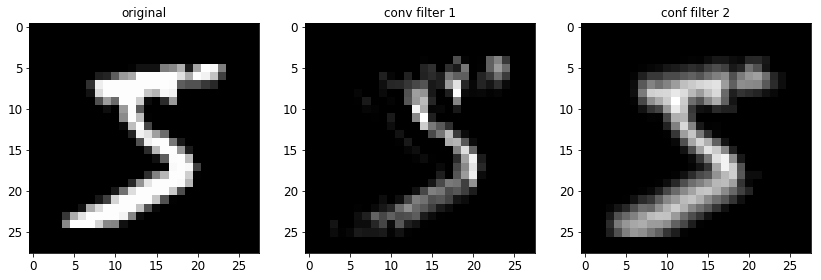

In [9]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
pl_images = [
    data.reshape([28, 28]),  # original
    out_conv[:, :, :, 0].reshape([28, 28]),  # conv - filter 1
    out_conv[:, :, :, 1].reshape([28, 28]),  # conv - filter 2
]

titles = ['original', 'conv filter 1', 'conf filter 2']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
#     axs[i].axis('off')

#### 3. Pooling Layer

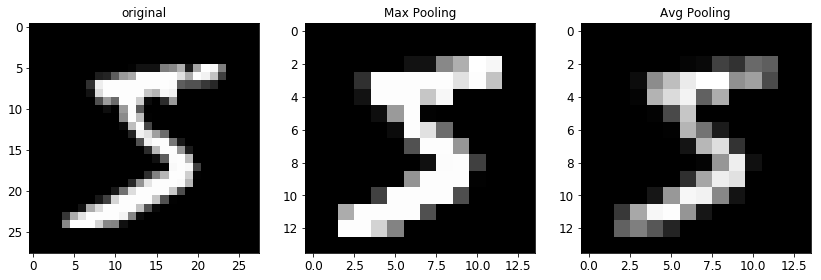

In [10]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
pl_images = [
    data.reshape([28, 28]),  # original
    out_maxpool.reshape([14, 14]),  # Max Pooling
    out_avgpool.reshape([14, 14]),  # Avg Pooling
]

titles = ['original', 'Max Pooling', 'Avg Pooling']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
#     axs[i].axis('off')